In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Explore Data Using Pandas 

In [2]:
data = pd.read_csv('./Preprocessed_data.csv')
data.head(5)

/home/hadoop/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,description,origin,status,car_mileage,car_color,car_seats,gear,car_year,car_price,style,model,fuel,brand_name,region_name,url_image,website,month,year,num_null
0,🔹 HÀNG MỚI VỀ\n🔹 BMW 520i \n🔹 MODEL 2016\n🔹 Od...,Đức,Đã sử dụng,50000.0,Đen,4.0,Tự động,2015.0,1.170000e+09,Sedan,5 Series,Xăng,BMW,Hà Nội,https://cdn.chotot.com/namB6E0XkDPkf9h8KoahoRB...,chotot,11,2021,0
1,Bán nissan - Gran Livina nhập khẩu số tự động ...,Nhật Bản,Đã sử dụng,12000.0,Xám,3.0,Tự động,2009.0,2.342500e+08,Minivan (MPV),Grand livina,Xăng,Nissan,Hà Nội,https://cdn.chotot.com/50R_cYWFPAz0wHZqPAGaFr-...,chotot,11,2021,0
2,Auto88 về Mercedes C200 sx 2017 đky 2/2018 chạ...,Việt Nam,Đã sử dụng,30000.0,Xám,2.0,Tự động,2018.0,1.090000e+09,Sedan,C Class,Xăng,Mercedes Benz,Hà Nội,https://cdn.chotot.com/bhfeL3dPtccDnzlKzeAZ88X...,chotot,11,2021,0
3,xe còn đẹp gia đình đang xử dụng. Cần bán xe đ...,Nhật Bản,Đã sử dụng,120.0,Trắng,2.0,Tự động,2017.0,4.900000e+08,Hatchback,CX 3,Xăng,Mazda,An Giang,https://cdn.chotot.com/bZA5uIvzseB-MBKCPcDKe4K...,chotot,11,2021,0
4,"Xe gia đình đi, còn khá mới vì do công việc nê...",Việt Nam,Đã sử dụng,53000.0,Đen,2.0,Tự động,2016.0,4.000000e+08,Sedan,Cruze,Xăng,Chevrolet,Tp Hồ Chí Minh,https://cdn.chotot.com/c7q5pfENmvTLnzxYQ7MA70P...,chotot,11,2021,0


In [3]:
# Drop some column unused to visualize
data.drop(['url_image'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65135 entries, 0 to 65134
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  65135 non-null  object 
 1   origin       65135 non-null  object 
 2   status       65135 non-null  object 
 3   car_mileage  65135 non-null  float64
 4   car_color    65135 non-null  object 
 5   car_seats    65135 non-null  object 
 6   gear         65135 non-null  object 
 7   car_year     65135 non-null  object 
 8   car_price    65135 non-null  float64
 9   style        65135 non-null  object 
 10  model        65135 non-null  object 
 11  fuel         65135 non-null  object 
 12  brand_name   65135 non-null  object 
 13  region_name  65135 non-null  object 
 14  website      65135 non-null  object 
 15  month        65135 non-null  int64  
 16  year         65135 non-null  int64  
 17  num_null     65135 non-null  int64  
dtypes: float64(2), int64(3), object(13)
memory usa

In [4]:
data['car_seats'].replace('Unknown','0.0', inplace=True)

In [5]:
data['car_seats'] = data['car_seats'].astype('float64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65135 entries, 0 to 65134
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  65135 non-null  object 
 1   origin       65135 non-null  object 
 2   status       65135 non-null  object 
 3   car_mileage  65135 non-null  float64
 4   car_color    65135 non-null  object 
 5   car_seats    65135 non-null  float64
 6   gear         65135 non-null  object 
 7   car_year     65135 non-null  object 
 8   car_price    65135 non-null  float64
 9   style        65135 non-null  object 
 10  model        65135 non-null  object 
 11  fuel         65135 non-null  object 
 12  brand_name   65135 non-null  object 
 13  region_name  65135 non-null  object 
 14  website      65135 non-null  object 
 15  month        65135 non-null  int64  
 16  year         65135 non-null  int64  
 17  num_null     65135 non-null  int64  
dtypes: float64(3), int64(3), object(12)
memory usa

In [7]:
data.drop(['num_null'], axis=1, inplace=True)
data.describe()

,car_mileage,car_seats,car_price,month,year
count,6.513500e+04,65135.000000,6.513500e+04,65135.000000,65135.000000
mean,1.406672e+05,4.533676,8.903779e+08,10.725248,2020.994703
std,1.693651e+07,2.510566,1.734558e+09,1.364346,0.076700
min,0.000000e+00,0.000000,1.100000e+07,1.000000,2019.000000
25%,0.000000e+00,2.000000,3.250000e+08,10.000000,2021.000000
50%,1.000000e+04,5.000000,5.270000e+08,11.000000,2021.000000
75%,6.000000e+04,5.000000,8.390000e+08,12.000000,2021.000000
max,4.294967e+09,47.000000,6.800000e+10,12.000000,2021.000000


In [8]:
data.describe()

,car_mileage,car_seats,car_price,month,year
count,6.513500e+04,65135.000000,6.513500e+04,65135.000000,65135.000000
mean,1.406672e+05,4.533676,8.903779e+08,10.725248,2020.994703
std,1.693651e+07,2.510566,1.734558e+09,1.364346,0.076700
min,0.000000e+00,0.000000,1.100000e+07,1.000000,2019.000000
25%,0.000000e+00,2.000000,3.250000e+08,10.000000,2021.000000
50%,1.000000e+04,5.000000,5.270000e+08,11.000000,2021.000000
75%,6.000000e+04,5.000000,8.390000e+08,12.000000,2021.000000
max,4.294967e+09,47.000000,6.800000e+10,12.000000,2021.000000


/home/hadoop/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='car_price'>

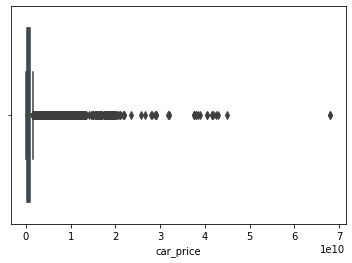

In [9]:
sns.boxplot(data['car_price'])

<AxesSubplot:>

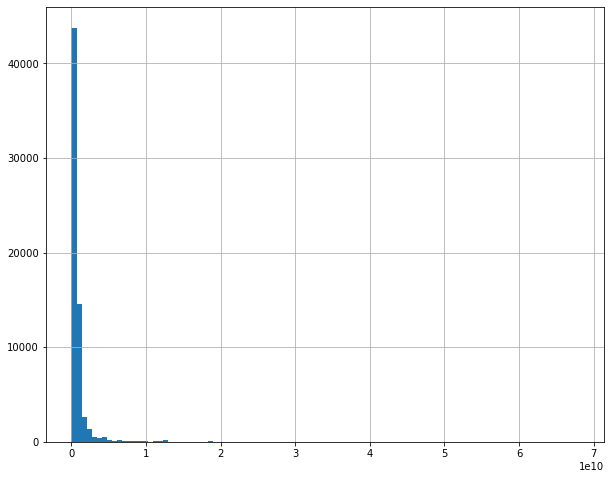

In [10]:
matplotlib.rcParams['figure.figsize'] = 10, 8
#car_price = data[data['car_price'] <= 2e10]
data['car_price'].hist(bins=100, grid=True)

In [11]:
data.head(2)

,description,origin,status,car_mileage,car_color,car_seats,gear,car_year,car_price,style,model,fuel,brand_name,region_name,website,month,year
0,🔹 HÀNG MỚI VỀ\n🔹 BMW 520i \n🔹 MODEL 2016\n🔹 Od...,Đức,Đã sử dụng,50000.0,Đen,4.0,Tự động,2015.0,1.170000e+09,Sedan,5 Series,Xăng,BMW,Hà Nội,chotot,11,2021
1,Bán nissan - Gran Livina nhập khẩu số tự động ...,Nhật Bản,Đã sử dụng,12000.0,Xám,3.0,Tự động,2009.0,2.342500e+08,Minivan (MPV),Grand livina,Xăng,Nissan,Hà Nội,chotot,11,2021


<AxesSubplot:>

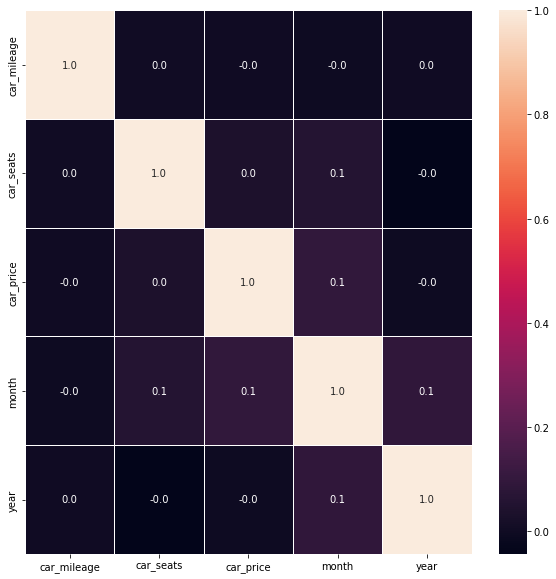

In [12]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [13]:
price_brand = data[['brand_name', 'car_price']].groupby(['brand_name']).mean()
price_brand.head(5)

,car_price
brand_name,
Acura,5.699477e+08
Alfa Romeo,7.352778e+08
Asia,1.676000e+08
Aston Martin,1.624500e+09
Audi,1.301657e+09


In [14]:
price_brand.reset_index(inplace=True)
price_brand.head(3)

,brand_name,car_price
0,Acura,5.699477e+08
1,Alfa Romeo,7.352778e+08
2,Asia,1.676000e+08


In [15]:
price_brand.sort_values('car_price', inplace=True)
price_brand.head(5)

,brand_name,car_price
78,Saturn,55000000.0
44,Lada,56000000.0
9,Buick,57500000.0
41,KIA,64000000.0
89,Vinaxuki,66000000.0


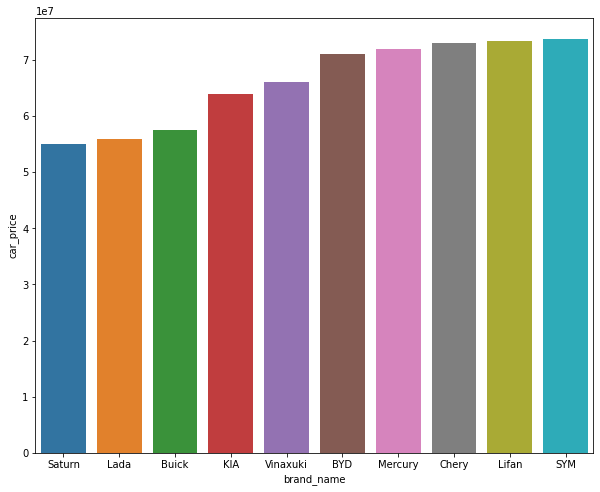

In [16]:
ax = sns.barplot(x='brand_name', y='car_price', data=price_brand.iloc[0:10])

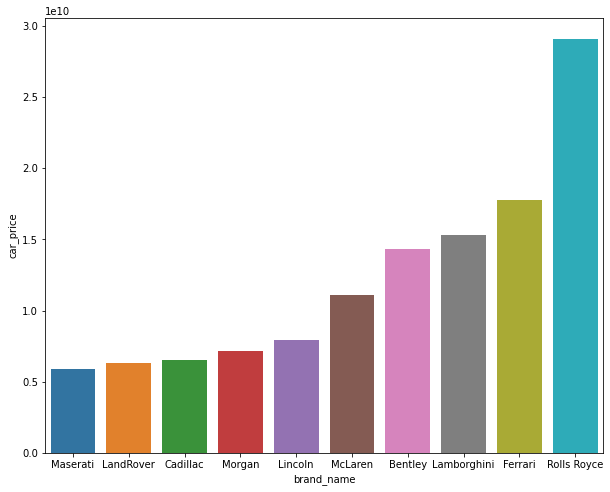

In [17]:
ax = sns.barplot(x='brand_name', y='car_price', data=price_brand[-10:])

<AxesSubplot:ylabel='car_price'>

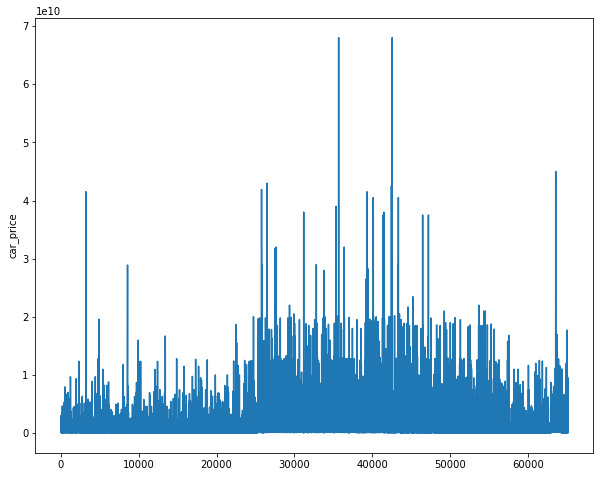

In [18]:
sns.lineplot(data=data['car_price'])

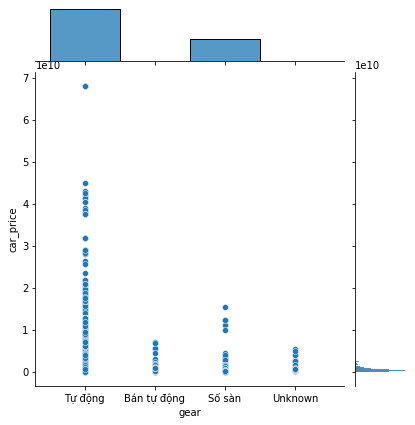

In [19]:
sns.jointplot(x='gear', y='car_price', data=data)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65135 entries, 0 to 65134
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  65135 non-null  object 
 1   origin       65135 non-null  object 
 2   status       65135 non-null  object 
 3   car_mileage  65135 non-null  float64
 4   car_color    65135 non-null  object 
 5   car_seats    65135 non-null  float64
 6   gear         65135 non-null  object 
 7   car_year     65135 non-null  object 
 8   car_price    65135 non-null  float64
 9   style        65135 non-null  object 
 10  model        65135 non-null  object 
 11  fuel         65135 non-null  object 
 12  brand_name   65135 non-null  object 
 13  region_name  65135 non-null  object 
 14  website      65135 non-null  object 
 15  month        65135 non-null  int64  
 16  year         65135 non-null  int64  
dtypes: float64(3), int64(2), object(12)
memory usage: 8.4+ MB


<AxesSubplot:xlabel='index'>

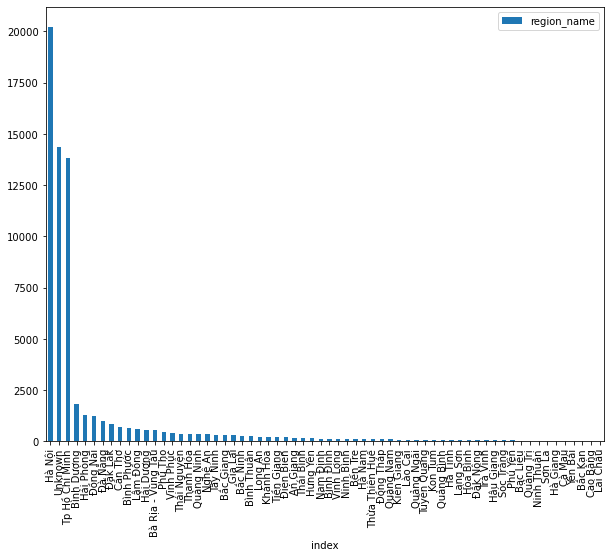

In [27]:
region = data.region_name.value_counts().reset_index()
region.plot.bar(x='index', y='region_name')